In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
df = pd.read_csv('./data/sample_moral_appeal.csv').drop(['Unnamed: 0'], axis=1)
df

,ad,moral_appeal
0,yearold danylo is not only battling cancer but...,1
1,learn how to use the new staffing law to impro...,0
2,we are live with climate activist anuna de wev...,0
3,did you miss the t summit relive the daylong e...,0
4,friday is north carolina’s online voter regist...,0
...,...,...
120,in just three months time they likely will be ...,0
121,we have until march st to raise money for our ...,0
122,ukraine needs your support\nany donation you p...,1
123,djibouti faces extreme water scarcity exacerba...,0


In [3]:
# creating prediction model

# creating the filters 
filters =  ['rights', 'equal', 'justice', 'protect', 'equality',  'social' , 'environment',  'popular', 'prohibition' ]

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.512
                 precision    recall  f1-score   support

no-moral_appeal       0.45      0.92      0.61        51
   moral_appeal       0.81      0.23      0.36        74

       accuracy                           0.51       125
      macro avg       0.63      0.58      0.48       125
   weighted avg       0.66      0.51      0.46       125

confusion matrix:
[[47  4]
 [57 17]]



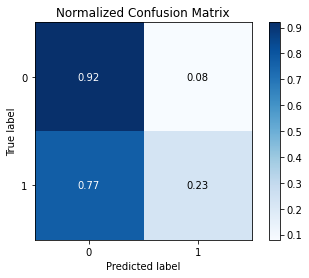

In [4]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['moral_appeal'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['moral_appeal'], y_pred, target_names=['no-moral_appeal', 'moral_appeal']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['moral_appeal'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['moral_appeal'], y_pred, normalize=True)
plt.show()